Using TensorFlow backend.


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10001490808133270563,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3181130547
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 439073493232753301
 physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

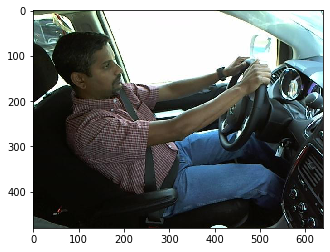

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
img=mpimg.imread('data/sample/train/c0/img_34.jpg')
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
from keras import backend as K
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [2]:
feature=[]
label =[]
for i in range(34, 100): #102088
    try:
        img = mpimg.imread('data/sample/train/c0/img_%d.jpg'%i)
    except OSError as e :
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature.append(row)
    label.append("0")
    
    

In [3]:
for i in range(34, 100): #102088
    try:
        img=mpimg.imread('data/sample/train/c2/img_%d.jpg'%i)
    except OSError as e:
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature.append(row)
    label.append("2")
         

In [4]:
for i in range(34, 100): #102088
    try:
        img=mpimg.imread('data/sample/train/c6/img_%d.jpg'%i)
    except OSError as e:
        i+=1
    row = np.reshape(img, (3 * 640 * 480))
    feature.append(row)
    label.append("6")



In [5]:
for i in range(34, 100): #102088
    try:
        img=mpimg.imread('data/sample/train/c7/img_%d.jpg'%i)
    except OSError as e:
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature.append(row)
    label.append("7")

In [6]:
df = pd.DataFrame(feature)
df1= pd.DataFrame(label)

df

,0,1,2,3,4,5,6,7,8,9,...,921590,921591,921592,921593,921594,921595,921596,921597,921598,921599
0,76,89,61,76,89,61,76,89,61,77,...,12,18,12,12,18,13,10,18,13,10
1,76,89,61,76,89,61,76,89,61,77,...,12,18,12,12,18,13,10,18,13,10
2,76,89,61,76,89,61,76,89,61,77,...,12,18,12,12,18,13,10,18,13,10
3,76,89,61,76,89,61,76,89,61,77,...,12,18,12,12,18,13,10,18,13,10
4,76,89,61,76,89,61,76,89,61,77,...,12,18,12,12,18,13,10,18,13,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,35,41,29,35,41,29,35,41,29,34,...,27,16,14,15,10,8,9,14,12,13
260,35,41,29,35,41,29,35,41,29,34,...,27,16,14,15,10,8,9,14,12,13
261,35,41,29,35,41,29,35,41,29,34,...,27,16,14,15,10,8,9,14,12,13
262,35,41,29,35,41,29,35,41,29,34,...,27,16,14,15,10,8,9,14,12,13


In [7]:
#Preprocessing
from sklearn.preprocessing import scale
y = label

X_train = scale(df)
X_train = X_train.astype('float32')

In [8]:
# One hot encoding
from keras.utils import np_utils
y = np_utils.to_categorical(df1,10)

In [9]:
#Testing label
feature1=[]
label1 =[]

for i in range(34, 50): #102088
    try:
        img = mpimg.imread('data/sample/valid/c0/img_%d.jpg'%i)
    except OSError as e :
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature1.append(row)
    label1.append("0")
    
for i in range(34, 50): #102088
    try:
        img=mpimg.imread('data/sample/valid/c2/img_%d.jpg'%i)
    except OSError as e:
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature1.append(row)
    label1.append("2")
    
for i in range(34, 50): #102088
    try:
        img=mpimg.imread('data/sample/valid/c6/img_%d.jpg'%i)
    except OSError as e:
        i+=1
    row = np.reshape(img, (3 * 640 * 480))
    feature1.append(row)
    label1.append("6")

for i in range(34, 50): #102088
    try:
        img=mpimg.imread('data/sample/valid/c7/img_%d.jpg'%i)
    except OSError as e:
        i+=1
        
    row = np.reshape(img, (3 * 640 * 480))
    feature1.append(row)
    label1.append("7")

X_test = pd.DataFrame(feature1)    
y_test= pd.DataFrame(label1)

#Preprocessing
from sklearn.preprocessing import scale
X_test = scale(X_test)


# One hot encoding
from keras.utils import np_utils
y_test = np_utils.to_categorical(y_test,10)



In [10]:
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

from keras.utils.data_utils import get_file
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image


#vgg_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32).reshape((3,1,1))
def vgg_preprocess(x):
    x = x - vgg_mean
    return x[:, ::-1] # reverse axis rgb->bgr

#Vgg Functions

class Vgg16():
    
    def get_batches(self, path, gen=image.ImageDataGenerator(), shuffle=True, batch_size=8, class_mode='categorical'):
        return gen.flow_from_directory(path, target_size=(224,224),
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)


    def ft(self, num):
        model = self.model
        model.pop()
        for layer in model.layers: layer.trainable=False
        model.add(Dense(num, activation='softmax'))
        model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
        self.compile()

    def finetune(self, batches):
        model = self.model
        model.pop()
        for layer in model.layers: layer.trainable=False
        model.add(Dense(batches.nb_class, activation='softmax'))
        self.compile()


    def compile(self, lr=0.001):
        self.model.compile(optimizer=Adam(lr=lr),
                loss='categorical_crossentropy', metrics=['accuracy'])


    def test(self, path, batch_size=8):
        test_batches = self.get_batches(path, shuffle=False, batch_size=batch_size, class_mode=None)
        return test_batches, self.model.predict_generator(test_batches, test_batches.nb_sample)

In [11]:
from vgg16 import Vgg16
vgg = Vgg16()
vgg.compile()
batches = vgg.get_batches(X_train,'data1/sample/train/', batch_size = 16)

val_batches = vgg.get_batches(y,'data1/sample/valid/', batch_size = 16)


E:\deep learn\Kaggle\statefarm_people_driving\vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
E:\deep learn\Kaggle\statefarm_people_driving\vgg16.py:58: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), dim_ordering="th"))
E:\deep learn\Kaggle\statefarm_people_driving\vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
E:\deep learn\Kaggle\statefarm_people_driving\vgg16.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
E:\deep learn\Kaggle\statefarm_people_driving\vgg16.py:56: Us

Found 3405 images belonging to 4 classes.
Found 1066 images belonging to 4 classes.


In [1]:
#VGG 16 model
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [13]:
#Training the VGG16 model

from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=50,generator=batches, validation_data= val_batches, validation_steps=10,epochs=200,callbacks=[checkpoint,early])

Epoch 1/200
50/50 [==============================] - 67s 1s/step - loss: 16.7124 - accuracy: 0.4325 - val_loss: 1.3689 - val_accuracy: 0.2937
Epoch 2/200


C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50/50 [==============================] - 52s 1s/step - loss: 1.3060 - accuracy: 0.4479 - val_loss: 1.5720 - val_accuracy: 0.2562
Epoch 3/200
50/50 [==============================] - 49s 982ms/step - loss: 1.2841 - accuracy: 0.4700 - val_loss: 1.3548 - val_accuracy: 0.2937
Epoch 4/200
50/50 [==============================] - 48s 964ms/step - loss: 1.3125 - accuracy: 0.4325 - val_loss: 1.6193 - val_accuracy: 0.2562
Epoch 5/200
50/50 [==============================] - 47s 945ms/step - loss: 1.2816 - accuracy: 0.4563 - val_loss: 1.6544 - val_accuracy: 0.2625
Epoch 6/200
50/50 [==============================] - 46s 929ms/step - loss: 1.3022 - accuracy: 0.4450 - val_loss: 1.5216 - val_accuracy: 0.2750
Epoch 7/200
50/50 [==============================] - 51s 1s/step - loss: 1.3076 - accuracy: 0.4391 - val_loss: 1.5753 - val_accuracy: 0.2468
Epoch 8/200
50/50 [==============================] - 49s 976ms/step - loss: 1.2675 - accuracy: 0.4812 - val_loss: 1.7186 - val_accuracy: 0.2062
Epoch 9/20

Epoch 59/200
50/50 [==============================] - 48s 952ms/step - loss: 1.2925 - accuracy: 0.4512 - val_loss: 1.5504 - val_accuracy: 0.2625
Epoch 60/200
50/50 [==============================] - 47s 943ms/step - loss: 1.2939 - accuracy: 0.4475 - val_loss: 1.5934 - val_accuracy: 0.2562
Epoch 61/200
50/50 [==============================] - 48s 958ms/step - loss: 1.2593 - accuracy: 0.4825 - val_loss: 1.5767 - val_accuracy: 0.3506
Epoch 62/200
50/50 [==============================] - 47s 941ms/step - loss: 1.3003 - accuracy: 0.4479 - val_loss: 1.5225 - val_accuracy: 0.2562
Epoch 63/200
50/50 [==============================] - 48s 954ms/step - loss: 1.2731 - accuracy: 0.4700 - val_loss: 1.4532 - val_accuracy: 0.2062
Epoch 64/200
50/50 [==============================] - 48s 955ms/step - loss: 1.3196 - accuracy: 0.4087 - val_loss: 1.6308 - val_accuracy: 0.2812
Epoch 65/200
50/50 [==============================] - 48s 958ms/step - loss: 1.2732 - accuracy: 0.4725 - val_loss: 1.3635 - val_ac

50/50 [==============================] - 48s 956ms/step - loss: 1.2876 - accuracy: 0.4512 - val_loss: 1.3415 - val_accuracy: 0.2625
Epoch 172/200
50/50 [==============================] - 48s 958ms/step - loss: 1.2922 - accuracy: 0.4462 - val_loss: 1.3687 - val_accuracy: 0.3125
Epoch 173/200
50/50 [==============================] - 48s 952ms/step - loss: 1.3068 - accuracy: 0.4366 - val_loss: 1.4213 - val_accuracy: 0.3063
Epoch 174/200
50/50 [==============================] - 48s 956ms/step - loss: 1.2949 - accuracy: 0.4462 - val_loss: 1.5393 - val_accuracy: 0.2500
Epoch 175/200
50/50 [==============================] - 48s 955ms/step - loss: 1.2544 - accuracy: 0.4875 - val_loss: 1.4901 - val_accuracy: 0.2727
Epoch 176/200
50/50 [==============================] - 48s 956ms/step - loss: 1.3077 - accuracy: 0.4341 - val_loss: 1.5160 - val_accuracy: 0.2438
Epoch 177/200
50/50 [==============================] - 47s 942ms/step - loss: 1.2846 - accuracy: 0.4575 - val_loss: 1.6305 - val_accuracy:

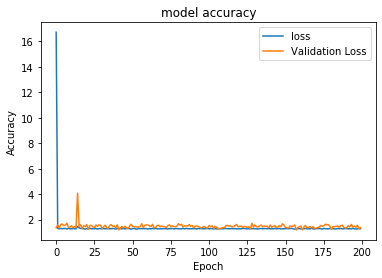

In [14]:
#Visualizing the result
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [15]:
###Testing
### c0= Not Distracted= Array_0
### c2= Using Phone= Array_1
### c6= Drinking= Array_2
### c6= Looking Back= Array_3

[3]
Driver is  looking back


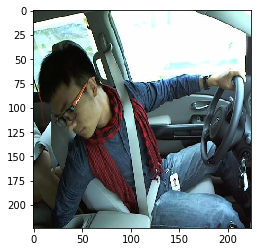

In [16]:
from keras.preprocessing import image
img7 = image.load_img('data1_test/sample/train/c7/img_96779.jpg',target_size=(224,224,3))
img7 = np.asarray(img7)
plt.imshow(img7)
img7 = np.expand_dims(img7, axis=0)
classes = ["Not Distracted", "Using Phone","Drinking","looking back"]
print(model.predict_classes(img7))
print("Driver is ",format(classes[model.predict_classes(img7)[0]]))


[3]
Driver is  looking back


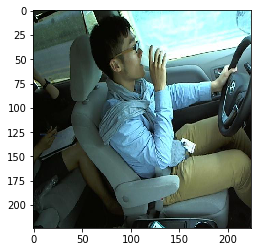

In [17]:
img6 = image.load_img('data1_test/sample/train/c6/img_98118.jpg',target_size=(224,224,3))
img6 = np.asarray(img6)
plt.imshow(img6)
img6 = np.expand_dims(img6, axis=0)
print(model.predict_classes(img6))
classes = ["Not Distracted", "Using Phone","Drinking","looking back"]
print("Driver is ",format(classes[model.predict_classes(img6)[0]]))

Driver is  looking back


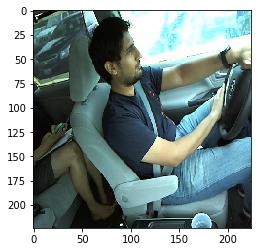

In [18]:
img0 = image.load_img('data1_test/sample/train/c0/img_97281.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Drinking","looking back"]
print("Driver is ",format(classes[model.predict_classes(img0)[0]]))

# Own Neural Network

In [1]:
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras.layers.core import Dense,Dropout,Flatten,Activation

Using TensorFlow backend.


In [2]:
own_model= Sequential() 
own_model.add(Convolution2D(64,3,3,border_mode="same",input_shape=(224, 224, 3),activation="relu"))

'''
Convolution2D(
    number-of-filters,
    row-size,
    col-size,
    border_mode="same",
    input_shape=(rgb3 bnw1,row on inp image,col),
    activation="relu"
    )
''' 

own_model.add(Convolution2D(64,3,3,border_mode="same",activation="relu"))  #another convolutional layer

own_model.add(MaxPooling2D(pool_size=(2,2)))   #performing max pooling

own_model.add(Convolution2D(128,3,3,border_mode="same",activation="relu"))   #another convolutional layer

own_model.add(Convolution2D(128,3,3,border_mode="same",activation="relu"))  #another convolutional layer

own_model.add(MaxPooling2D(pool_size=(2,2)))   #performing max pooling

#converting tensors in vectors
own_model.add(Flatten())

#dense layer
own_model.add(Dense(128,activation="relu"))
own_model.add(Dense(128,activation="relu"))
own_model.add(Dense(7,activation="softmax")) # 7 = Number of Categories for classification

own_model.compile(loss="categorical_crossentropy",optimizer=Adam(),metrics=['accuracy'])
own_model.summary()

C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(224, 224,..., activation="relu", padding="same")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 401408)           

C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`


In [3]:
#PreProcessing
from keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(rescale=1./255)
val_gen=ImageDataGenerator(rescale=1./255)

In [4]:
batches=train_gen.flow_from_directory("data/sample/train/",target_size=(224, 224),batch_size=16,class_mode="categorical")
val_batches=val_gen.flow_from_directory("data/sample/train/",target_size=(224, 224),batch_size=16,class_mode="categorical")

Found 13355 images belonging to 7 classes.
Found 13355 images belonging to 7 classes.


In [5]:
hist1=own_model.fit_generator(batches,samples_per_epoch=100,nb_epoch=80,validation_data=val_batches,nb_val_samples=20)


C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\rajat\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=6, epochs=80, validation_steps=20)`
  """Entry point for launching an IPython kernel.


Epoch 1/80
6/6 [==============================] - 10s 2s/step - loss: 4.1102 - accuracy: 0.1146 - val_loss: 1.8993 - val_accuracy: 0.1531
Epoch 2/80
6/6 [==============================] - 6s 1s/step - loss: 1.9375 - accuracy: 0.1562 - val_loss: 1.9614 - val_accuracy: 0.1312
Epoch 3/80
6/6 [==============================] - 6s 1s/step - loss: 1.9610 - accuracy: 0.1354 - val_loss: 1.9433 - val_accuracy: 0.1656
Epoch 4/80
6/6 [==============================] - 6s 1s/step - loss: 1.9460 - accuracy: 0.1562 - val_loss: 1.9439 - val_accuracy: 0.1750
Epoch 5/80
6/6 [==============================] - 8s 1s/step - loss: 1.9453 - accuracy: 0.1648 - val_loss: 1.9463 - val_accuracy: 0.1656
Epoch 6/80
6/6 [==============================] - 6s 993ms/step - loss: 1.9451 - accuracy: 0.1771 - val_loss: 1.9476 - val_accuracy: 0.1531
Epoch 7/80
6/6 [==============================] - 6s 1s/step - loss: 1.9466 - accuracy: 0.1458 - val_loss: 1.9405 - val_accuracy: 0.1688
Epoch 8/80
6/6 [=====================

Epoch 60/80
6/6 [==============================] - 6s 1s/step - loss: 0.6201 - accuracy: 0.7500 - val_loss: 0.3812 - val_accuracy: 0.8875
Epoch 61/80
6/6 [==============================] - 6s 991ms/step - loss: 0.4149 - accuracy: 0.8750 - val_loss: 0.6657 - val_accuracy: 0.8313
Epoch 62/80
6/6 [==============================] - 6s 1s/step - loss: 0.5783 - accuracy: 0.8333 - val_loss: 0.2330 - val_accuracy: 0.8750
Epoch 63/80
6/6 [==============================] - 6s 991ms/step - loss: 0.4346 - accuracy: 0.8333 - val_loss: 0.5248 - val_accuracy: 0.9094
Epoch 64/80
6/6 [==============================] - 8s 1s/step - loss: 0.3037 - accuracy: 0.9062 - val_loss: 0.2187 - val_accuracy: 0.8813
Epoch 65/80
6/6 [==============================] - 6s 1s/step - loss: 0.1793 - accuracy: 0.9688 - val_loss: 0.0176 - val_accuracy: 0.9375
Epoch 66/80
6/6 [==============================] - 6s 991ms/step - loss: 0.3303 - accuracy: 0.9062 - val_loss: 0.0478 - val_accuracy: 0.9000
Epoch 67/80
6/6 [========

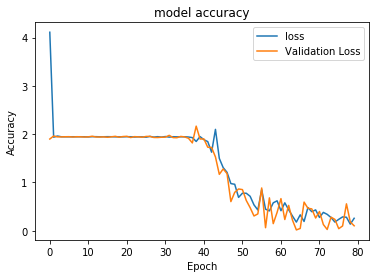

In [7]:
#Visualizing the result
import matplotlib.pyplot as plt

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

[5]
Driver is looking back


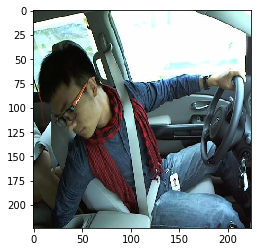

In [8]:
from keras.preprocessing import image
import numpy as np

img7 = image.load_img('data1_test/sample/train/c7/img_96779.jpg',target_size=(224,224,3))
img7 = np.asarray(img7)
plt.imshow(img7)
img7 = np.expand_dims(img7, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print(own_model.predict_classes(img7))
print("Driver is",format(classes[own_model.predict_classes(img7)[0]]))

Driver is Not Distracted


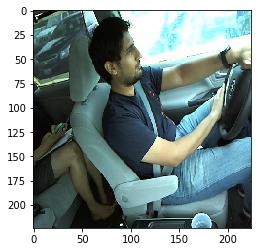

In [9]:
img0 = image.load_img('data1_test/sample/train/c0/img_97281.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img0)[0]]))

Driver is Using Phone


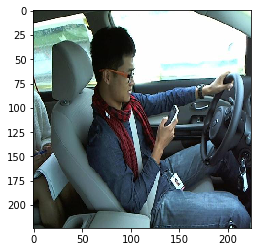

In [10]:
img0 = image.load_img('data/sample/train/c1/img_928.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img0)[0]]))

[2]
Driver is Talking on Phone


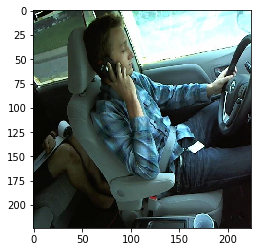

In [11]:
img2 = image.load_img('data1_test/sample/train/c2/img_100646.jpg',target_size=(224,224,3))
img2 = np.asarray(img2)
plt.imshow(img2)

img2 = np.expand_dims(img2, axis=0)
print(own_model.predict_classes(img2))
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img2)[0]]))

Driver is Adjusting Music


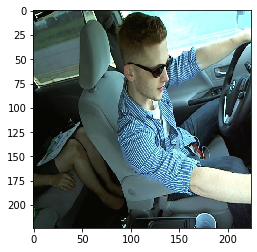

In [12]:
img0 = image.load_img('data/sample/train/c5/img_63.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img0)[0]]))

Driver is Drinking


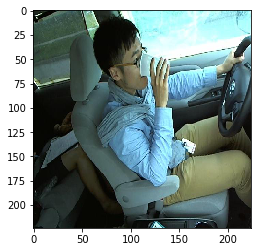

In [13]:
img0 = image.load_img('data1_test/sample/train/c6/img_101746.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img0)[0]])) 

Driver is Looking on Right


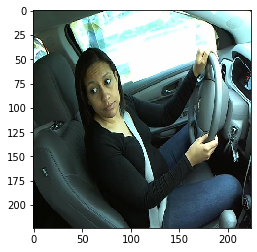

In [14]:
img0 = image.load_img('data/sample/train/c9/img_24808.jpg',target_size=(224,224,3))
img0 = np.asarray(img0)
plt.imshow(img0)
img0 = np.expand_dims(img0, axis=0)
classes = ["Not Distracted", "Using Phone","Talking on Phone","Adjusting Music","Drinking","looking back","Looking on Right"]
print("Driver is",format(classes[own_model.predict_classes(img0)[0]]))